## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Guido
- Apellido: Cambieri
- Legajo: 1415098

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
#cargo el dataset en datasettp1_df
datasettp1_df = pd.read_csv('C:/Users/guido/Documents/UTN/INGENIERIA INDUSTRIAL/CS de Datos/TP1/ClusterAI_TP_dataset_diabetes.csv')
#chequeo con un head como se ven las primeras 5 lineas (manera de chequear si cargo)
datasettp1_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [3]:
filas = np.shape(datasettp1_df)[0] # [0] para la primera dimension: FILAS
print(f'FILAS: {filas}')

FILAS: 768


In [4]:
columnas = np.shape(datasettp1_df)[1] # [1] para la segunda dimension: COLUMNAS
print(f'COLUMNAS: {columnas}')

COLUMNAS: 9


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [5]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
# uso .info() para que sea todo en una linea
nombre_columnas = datasettp1_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [6]:
datasettp1_df['Outcome'].value_counts(normalize=True,dropna=False)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [7]:
# Con el .T transpongo la presentacion del df
datasettp1_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

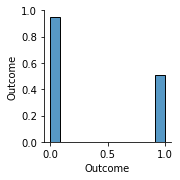

In [8]:
#este metodo sirve para ver como covarian variables. Aca se esta comparando Outcome con ella misma. Esta toma valores 0 o 1
#vemos que los NO Diabeticos superan por casi el doble a los Diabeticos.
sns.pairplot(datasettp1_df[["Outcome"]])
plt.show()

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

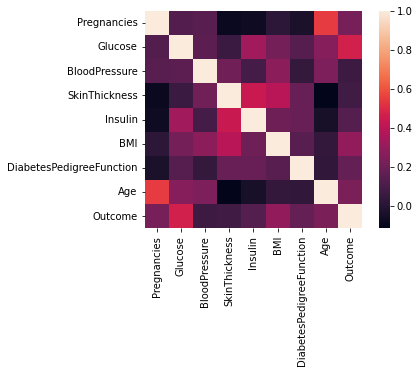

In [9]:
# 1- las mas correlacionadas parecen ser Pregnancies y Age
# 2- La relacion lineal por el heatmap indica que se encuentra debajo del 0.8, no parece ser una buena correlacion lineal.
# 3- Por ahora ninguna
correlacion = datasettp1_df.corr()
sns.heatmap(correlacion, vmax=1, square=True);

##### **Objetivo 8**
Hacer un histograma de la variable BMI

D:\Users\guido\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

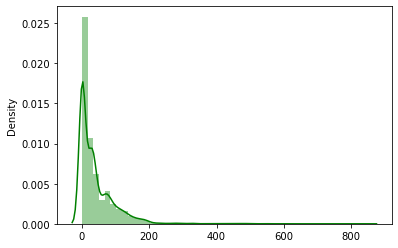

In [10]:
#fig, ax = plt.subplots(figsize=(10, 10))
#sns.histplot(data=datasettp1_df, x='BMI', hue='BMI', stat='count', edgecolor=None)
#ax.set_title('BMI')

sns.distplot(datasettp1_df,label = "BMI", color = 'green')

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

{'whiskers': [<matplotlib.lines.Line2D at 0x19bb80498e0>,
 'caps': [<matplotlib.lines.Line2D at 0x19bb8049eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19bb8049610>],
 'medians': [<matplotlib.lines.Line2D at 0x19bb8057490>],
 'fliers': [<matplotlib.lines.Line2D at 0x19bb8057760>],
 'means': []}

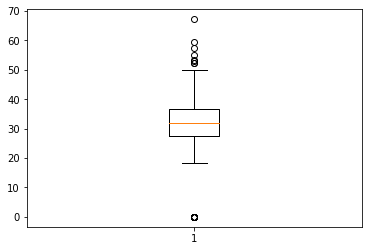

In [11]:
#Si hay varios outliers, por encima del maximo y uno por debajo del minimo.
plt.boxplot(datasettp1_df[["BMI"]])

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [12]:
# imprimo el df original
np.shape(datasettp1_df)

(768, 9)

In [13]:
# lo normalizo
datasettp1_df.BMI.value_counts(normalize=True)

32.0    0.016927
31.6    0.015625
31.2    0.015625
0.0     0.014323
32.4    0.013021
          ...   
36.7    0.001302
41.8    0.001302
42.6    0.001302
42.8    0.001302
46.3    0.001302
Name: BMI, Length: 248, dtype: float64

In [14]:
#limpio los outliers mayores a 50 (el maximo del boxplot) y lo guardo en un nuevo df
datasettp1_df_filtrado = datasettp1_df.loc[datasettp1_df['BMI'] <= 50 ]

In [15]:
#impirmio el nuevo_df
np.shape(datasettp1_df_filtrado)

(760, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x19bb80c03a0>,
 'caps': [<matplotlib.lines.Line2D at 0x19bb80c0940>,
 'boxes': [<matplotlib.lines.Line2D at 0x19bb80c00d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19bb80c0ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19bb80cc1f0>],
 'means': []}

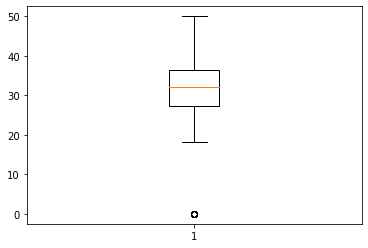

In [16]:
# veo en un nuevo boxplot del df_nuevo los outliers arriba del maximo que no estan mas
plt.boxplot(datasettp1_df_filtrado[["BMI"]])

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

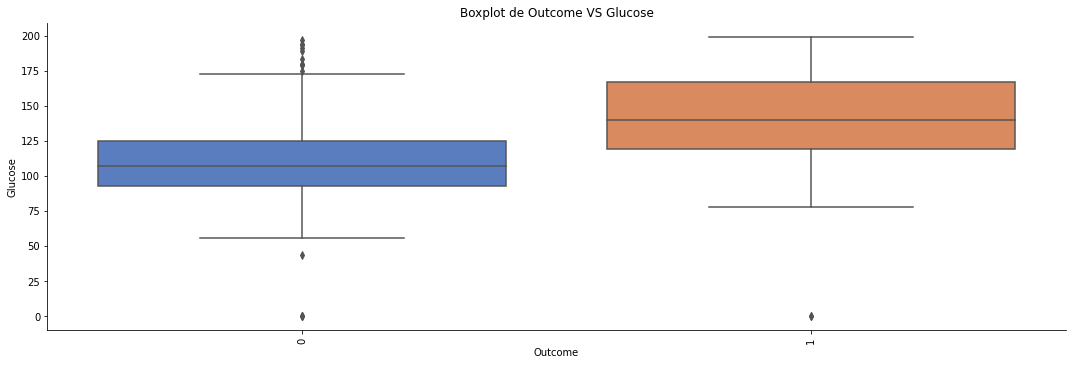

In [17]:
g = sns.catplot(x="Outcome",y="Glucose",data=datasettp1_df, kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=False) # Para quitar los el eje Y del plot
g.set_xticklabels(rotation=90)

plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.title('Boxplot de Outcome VS Glucose',size = 12)
plt.show()

#Los que no tienen diabetes Outcome=0, tienen menos glucosa en promedio que los que si tienen Outcome=1.
#La media de los sin diabetes ronda los 110 y su 3Q a penas sobrepasa el 1Q de los de Con Diabetes (media 135)

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

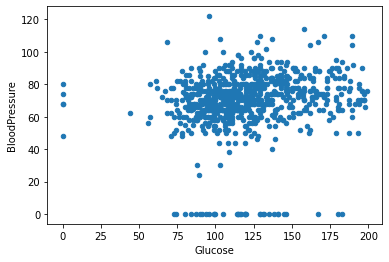

In [18]:
datasettp1_df.plot(kind="scatter", x="Glucose", y="BloodPressure")

#no veo relacion entre las varialbes. Solo hay una concentracion cuando los valores de BloodPressure se acercan a 70 y los de 
#Glucose a 100 aprox. Pero no quiere decir que exista relacion entre ellas. (al menos lineal)

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [19]:
#creo los segmentos y luego los transformo a string
rango1 = datasettp1_df[datasettp1_df["Age"]<30]
rango2 = datasettp1_df[(datasettp1_df["Age"]>=30) & (datasettp1_df["Age"]<40)]
rango3 = datasettp1_df[datasettp1_df["Age"]>40]
rango1 = str(rango1)
rango2 = str(rango2)
rango3 = str(rango3)

In [20]:
datasettp1_df.loc[(datasettp1_df['Age'] > 0) & (datasettp1_df['Age'] <= 30), 'Banda'] = 'Menor30'
datasettp1_df.loc[(datasettp1_df['Age'] > 30) & (datasettp1_df['Age'] <= 40), 'Banda'] = 'Entre30y40'
datasettp1_df.loc[(datasettp1_df['Age'] > 40), 'Banda'] = 'Mayor40'

##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

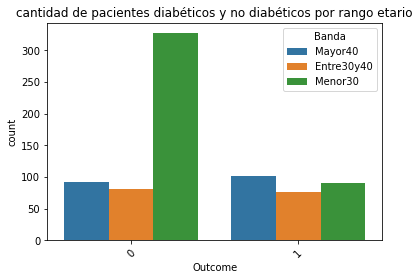

In [21]:
az = sns.countplot(x="Outcome", hue = "Banda", data=datasettp1_df)
plt.xticks(rotation=45)
plt.title("cantidad de pacientes diabéticos y no diabéticos por rango etario")
plt.show()

#Conclusion: a partir de los 30 años, no hay distincion por edad para tener o no diabetes.
#Los menores de 30 en su mayoria no poseen diabetes